In [1]:
#Imports library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
# Read the CSV file into a DataFrame
heart_data=pd.read_csv("../Assignment/heart.csv")

In [4]:
# What factors influence the likelihood of heart disease in patients according to the dataset? 

In [10]:
#Print the first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Print the last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#Number of rows and columns
heart_data.shape

(303, 14)

In [7]:
#Getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Checking for missing values
heart_data.isnull().sum()
#No missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#Get statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#Checing the distribution of target variable
heart_data['target'].value_counts()
#1 have defects, 0 not present (Healthy)

target
1    165
0    138
Name: count, dtype: int64

In [14]:
#Split the features and Targets
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [12]:
print (X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [13]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [6]:
# What is the distribution of cholesterol levels among patients with heart disease, and how does it compare to those without heart disease? Please visualize this using a histogram or a density plot. 

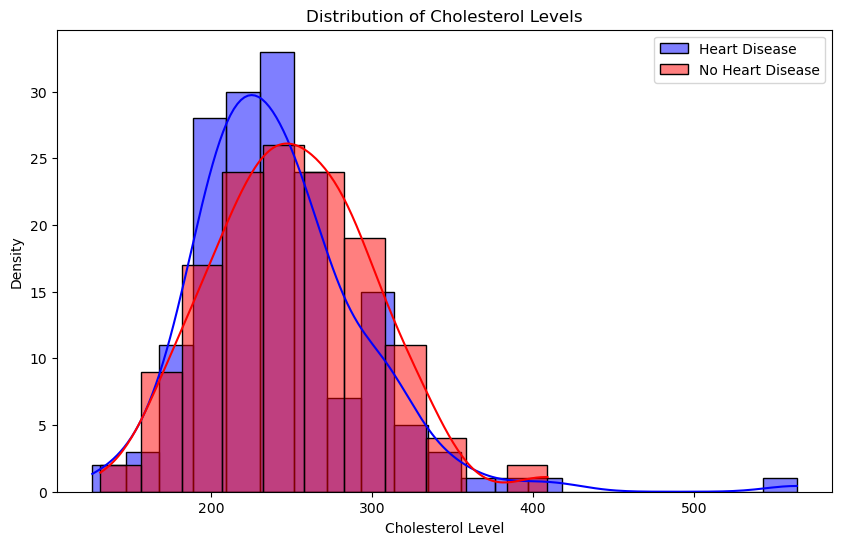

In [14]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot density plot for cholesterol levels of patients with heart disease
sns.histplot(heart_data[heart_data['target'] == 1]['chol'], color='blue', label='Heart Disease', kde=True)

# Plot density plot for cholesterol levels of patients without heart disease
sns.histplot(heart_data[heart_data['target'] == 0]['chol'], color='red', label='No Heart Disease', kde=True)

# Set labels and title
plt.xlabel('Cholesterol Level')
plt.ylabel('Density')
plt.title('Distribution of Cholesterol Levels')
plt.legend()

# Show the plot
plt.show()


In [10]:
# Is there a relationship between the number of chest pain types experienced by patients and the likelihood of heart disease? 

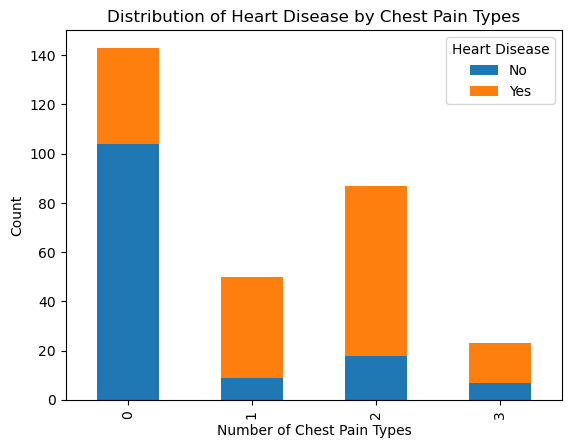

In [15]:
cross_tab = pd.crosstab(heart_data['cp'], heart_data['target'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Number of Chest Pain Types')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Chest Pain Types')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


In [8]:
# Can you use a heatmap to depict the correlation between different variables in the dataset, such as age, cholesterol levels, and maximum heart rate achieved?

Features with Positive Correlation:
  Feature 1 Feature 2  Correlation
0       age      chol     0.213678


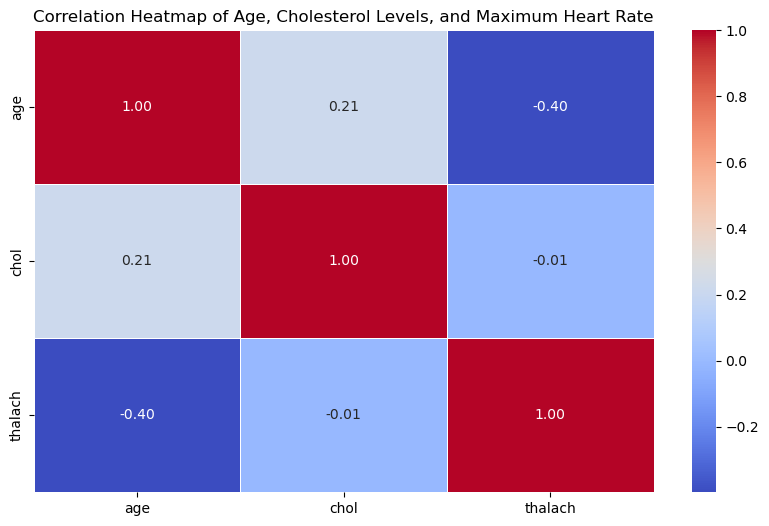

In [16]:
# Select the variables of interest
variables_of_interest = ['age', 'chol', 'thalach']

# Calculate the correlation matrix
correlation_matrix = heart_data[variables_of_interest].corr()
# Filter the correlation matrix to include only positive correlations
positive_correlation_matrix = correlation_matrix[correlation_matrix > 0]

# Find feature pairs with positive correlation
positive_correlation_features = positive_correlation_matrix[positive_correlation_matrix < 1].stack().reset_index()

# Rename the columns
positive_correlation_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter out duplicate pairs and sort by correlation coefficient
positive_correlation_features = positive_correlation_features.drop_duplicates(subset='Correlation', keep='first').sort_values(by='Correlation', ascending=False)

# Print the features with positive correlation
print("Features with Positive Correlation:")
print(positive_correlation_features)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Age, Cholesterol Levels, and Maximum Heart Rate')
plt.show()


In [17]:
#Splitting the data into training data and Test data

In [16]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
#Check data
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [20]:
#Model Training
#Logistic Regression

In [22]:
model= LogisticRegression()

In [22]:
#Training the LogisticRegression model with the training data and Test data

In [24]:
model.fit(X_train, Y_train)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#Model Evaluation

In [25]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data: ', training_data_accuracy)

Accuracy on Training data:  0.8512396694214877


In [26]:
#Accuracy on Test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Training data: ', test_data_accuracy)

Accuracy on Training data:  0.819672131147541


In [27]:
#Building a predictive system

In [28]:
input_data  =(50,1,0,150,243,0,0,128,0,2.6,1,0,3)

#Change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#Reshape the numpy as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The person does not have a Heart Disease')
else:
    print('The person has Heart Disease')

[0]
The person does not have a Heart Disease


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
#Training the Random Forest model with the training data and test data

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision on training data
rf_training_precision = precision_score(Y_train, rf_train_predictions)

# Recall on training data
rf_training_recall = recall_score(Y_train, rf_train_predictions)

# F1-score on training data
rf_training_f1_score = f1_score(Y_train, rf_train_predictions)

print('Precision on Training data:', rf_training_precision)
print('Recall on Training data:', rf_training_recall)
print('F1-score on Training data:', rf_training_f1_score)

# Precision on test data
rf_test_precision = precision_score(Y_test, rf_test_predictions)

# Recall on test data
rf_test_recall = recall_score(Y_test, rf_test_predictions)

# F1-score on test data
rf_test_f1_score = f1_score(Y_test, rf_test_predictions)

print('Precision on Test data:', rf_test_precision)
print('Recall on Test data:', rf_test_recall)
print('F1-score on Test data:', rf_test_f1_score)




NameError: name 'rf_train_predictions' is not defined

In [ ]:
#Building a predictive system

In [ ]:
import numpy as np

# Change the input data to a numpy array
input_data = (50, 1, 0, 150, 243, 0, 0, 128, 0, 2.6, 1, 0, 3)
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Predict using the trained model
prediction = rf_classifier.predict(input_data_reshaped)

# Print the prediction
if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')


In [ ]:
#Training the Support Vector Machine model with the training data and test data

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on training data
svm_train_predictions = svm_classifier.predict(X_train)

# Make predictions on test data
svm_test_predictions = svm_classifier.predict(X_test)

# Precision on training data
svm_training_precision = precision_score(Y_train, svm_train_predictions)

# Recall on training data
svm_training_recall = recall_score(Y_train, svm_train_predictions)

# F1-score on training data
svm_training_f1_score = f1_score(Y_train, svm_train_predictions)

print('Precision on Training data:', svm_training_precision)
print('Recall on Training data:', svm_training_recall)
print('F1-score on Training data:', svm_training_f1_score)

# Precision on test data
svm_test_precision = precision_score(Y_test, svm_test_predictions)

# Recall on test data
svm_test_recall = recall_score(Y_test, svm_test_predictions)

# F1-score on test data
svm_test_f1_score = f1_score(Y_test, svm_test_predictions)

print('Precision on Test data:', svm_test_precision)
print('Recall on Test data:', svm_test_recall)
print('F1-score on Test data:', svm_test_f1_score)


In [ ]:
#Training the K Nearest Neighbours model with the training data and test data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the K Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_classifier.fit(X_train, Y_train)

# Make predictions on training data
knn_train_predictions = knn_classifier.predict(X_train)

# Make predictions on test data
knn_test_predictions = knn_classifier.predict(X_test)

# Precision on training data
knn_training_precision = precision_score(Y_train, knn_train_predictions)

# Recall on training data
knn_training_recall = recall_score(Y_train, knn_train_predictions)

# F1-score on training data
knn_training_f1_score = f1_score(Y_train, knn_train_predictions)

print('Precision on Training data:', knn_training_precision)
print('Recall on Training data:', knn_training_recall)
print('F1-score on Training data:', knn_training_f1_score)

# Precision on test data
knn_test_precision = precision_score(Y_test, knn_test_predictions)

# Recall on test data
knn_test_recall = recall_score(Y_test, knn_test_predictions)

# F1-score on test data
knn_test_f1_score = f1_score(Y_test, knn_test_predictions)

print('Precision on Test data:', knn_test_precision)
print('Recall on Test data:', knn_test_recall)
print('F1-score on Test data:', knn_test_f1_score)


In [ ]:
#Training the XG Boost model with the training data and test data

In [ ]:
pip install xgboost

In [71]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train, Y_train)

# Make predictions on training data
xgb_train_predictions = xgb_classifier.predict(X_train)

# Make predictions on test data
xgb_test_predictions = xgb_classifier.predict(X_test)

# Precision on training data
xgb_training_precision = precision_score(Y_train, xgb_train_predictions)

# Recall on training data
xgb_training_recall = recall_score(Y_train, xgb_train_predictions)

# F1-score on training data
xgb_training_f1_score = f1_score(Y_train, xgb_train_predictions)

print('Precision on Training data:', xgb_training_precision)
print('Recall on Training data:', xgb_training_recall)
print('F1-score on Training data:', xgb_training_f1_score)

# Precision on test data
xgb_test_precision = precision_score(Y_test, xgb_test_predictions)

# Recall on test data
xgb_test_recall = recall_score(Y_test, xgb_test_predictions)

# F1-score on test data
xgb_test_f1_score = f1_score(Y_test, xgb_test_predictions)

print('Precision on Test data:', xgb_test_precision)
print('Recall on Test data:', xgb_test_recall)
print('F1-score on Test data:', xgb_test_f1_score)


Precision on Training data: 1.0
Recall on Training data: 1.0
F1-score on Training data: 1.0
Precision on Test data: 0.78125
Recall on Test data: 0.7575757575757576
F1-score on Test data: 0.7692307692307692


In [75]:
import numpy as np
from xgboost import XGBClassifier

# Assuming X_train and y_train are your training data
# Initialize and train the XGBoost model
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

# Define the input data
input_data = np.array([(50, 1, 0, 150, 243, 0, 0, 128, 0, 2.6, 1, 0, 3)])

# Reshape the input data as we are predicting for only one instance
input_data_reshaped = input_data.reshape(1, -1)

# Make predictions using the trained model
prediction = xgb_classifier.predict(input_data_reshaped)

# Print the prediction
if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')


The person does not have heart disease.


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)

# Make predictions using Random Forest
rf_test_predictions = rf_classifier.predict(X_test)

# Calculate accuracy for Random Forest
rf_test_accuracy = accuracy_score(Y_test, rf_test_predictions)

print('Random Forest - Test Accuracy:', rf_test_accuracy)

# Initialize and train XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

# Make predictions using XGBoost
xgb_test_predictions = xgb_classifier.predict(X_test)

# Calculate accuracy for XGBoost
xgb_test_accuracy = accuracy_score(Y_test, xgb_test_predictions)

print('XGBoost - Test Accuracy:', xgb_test_accuracy)

# Compare accuracies and select the best model
if rf_test_accuracy > xgb_test_accuracy:
    print('Random Forest is the best-performing model.')
elif rf_test_accuracy < xgb_test_accuracy:
    print('XGBoost is the best-performing model.')
else:
    print('Both Random Forest and XGBoost have the same accuracy.')


Random Forest - Test Accuracy: 0.8032786885245902
XGBoost - Test Accuracy: 0.7540983606557377
Random Forest is the best-performing model.


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and target variable respectively
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8360655737704918


In [46]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Input data
input_data = np.array([[50, 1, 0, 150, 243, 0, 0, 128, 0, 2.6, 1, 0, 3]])

# Make prediction using the trained Random Forest model
prediction = rf_classifier.predict(input_data)

# Print prediction
if prediction[0] == 0:
    print('The person does not have Heart Disease')
else:
    print('The person has Heart Disease')


The person does not have Heart Disease


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
